# Lab 7.01

In [57]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
import statistics

In [2]:
data = pd.read_csv('learningSet.csv')
data.shape

(95412, 481)

## Instructions 

### Complete the following steps on the categorical columns in the dataset:

* Check for null values in all the columns

* Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories

ZIP CODE - we are including state already

* Identify columns that over 85% missing values

* Remove those columns from the dataframe

* Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

Note that there are a few null values in the column. We will first replace those null values using the code below:

print(categorical['GENDER'].value_counts())

categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [3]:
categorical = data.select_dtypes(np.object)
categorical

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,XXXX,C2,27,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,XXXX,C1,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,XXXX,C3,30,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,XXXX,C1,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [4]:
categorical = categorical.apply (lambda x: x.replace(" ", np.NaN))

In [5]:
categorical_null_per_df = pd.DataFrame((categorical.isna().sum()/len(categorical))).reset_index()
categorical_null_per_df.columns = ['column_name', 'null_percent']
categorical_null_per_df.head()

,column_name,null_percent
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.985337
4,PVASTATE,0.984719


In [6]:
columns_above_threshold = categorical_null_per_df[categorical_null_per_df['null_percent'] > 0.85]
print(len(columns_above_threshold['column_name']))

30


In [7]:
drop_list = list(columns_above_threshold['column_name'])
drop_list.append('OSOURCE')
drop_list.append('ZIP')

In [8]:
print(drop_list)

['MAILCODE', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'OSOURCE', 'ZIP']


In [9]:
categorical = categorical.drop(columns = drop_list)

In [10]:
categorical.shape

(95412, 42)

In [11]:
categorical['GENDER'].value_counts()

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [12]:
categorical['GENDER'].isna().sum()

2957

In [13]:
def clean_gender(x):
    categorical[x] = categorical[x].fillna('F')
    categorical[x] = np.where(categorical[x].isin(['F','M']), categorical[x], 'other')
    return categorical[x].value_counts()

In [14]:
clean_gender('GENDER')

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [15]:
categorical.head()

,STATE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE,PETS,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,0,XXXX,T2,36,NaN,NaN,F,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,0,XXXX,S1,14,E,H,M,3,2,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,NC,0,XXXX,R2,43,NaN,U,M,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,0,XXXX,R2,44,E,U,F,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,FL,0,XXXX,S2,16,E,H,F,3,NaN,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


# Lab 7.02

## Instructions 

* Check for null values in the numerical columns.
* Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
* Use appropriate EDA technique where ever necessary.

In [16]:
numerical = data.select_dtypes(np.number)
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [31]:
numerical_nulls_df = pd.DataFrame(numerical.isna().sum()).reset_index()
numerical_nulls_df.columns = ['column_name', 'nulls']
pd.set_option("display.max_rows", None)
numerical_nulls_df[numerical_nulls_df['nulls'] > 0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
7,MBCRAFT,52854
8,MBGARDEN,52854
9,MBBOOKS,52854
10,MBCOLECT,52914
11,MAGFAML,52854
12,MAGFEM,52854
13,MAGMALE,52854


In [34]:
columns_above_threshold_2 = numerical_nulls_df[numerical_nulls_df['nulls'] > 50000]
drop_list_2 = list(columns_above_threshold_2['column_name'])
print(len(drop_list_2))
numerical = numerical.drop(columns = drop_list_2)

37


In [23]:
col_check = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']

In [67]:
for col in col_check:
    print('')
    print(f'{col} data type is {data[col].dtype}.')
    print(data[col].value_counts())


GEOCODE2 data type is object.
A    34671
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

WEALTH1 data type is float64.
9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

ADI data type is object.
13.0     7296
other    5835
51.0     4622
65.0     3765
57.0     2836
105.0    2617
197.0    2075
109.0    2054
131.0    1978
67.0     1847
201.0    1772
107.0    1746
275.0    1717
233.0    1676
127.0    1651
329.0    1647
75.0     1588
241.0    1573
15.0     1472
83.0     1305
351.0    1193
111.0    1127
279.0    1075
213.0    1073
59.0     1000
157.0     996
129.0     955
181.0     924
281.0     863
0.0       843
367.0     813
271.0     807
577.0     773
263.0     745
335.0     696
63.0      686
209.0     669
179.0     656
455.0     645
291.0     634
337.0     613
269.0     611
215.0     602
245.0     597
315.0     585
71.0      582
221.0     576
307.0     573
203.0     558
133.0

In [22]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].replace(' ', 'A')
categorical['GEOCODE2'].value_counts()

A    34671
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [35]:
df_count_adi = pd.DataFrame(data['ADI'].value_counts().reset_index())
df_count_adi.columns = ['ADI', 'count']
df_count_adi

,ADI,count
0,13.0,7296
1,51.0,4622
2,65.0,3765
3,57.0,2836
4,105.0,2617
5,197.0,2075
6,109.0,2054
7,131.0,1978
8,67.0,1847
9,201.0,1772


In [37]:
other_adi = list(df_count_adi[df_count_adi['count'] < 200]['ADI'])

In [38]:
def clean_adi(x):
    if x in other_adi:
        return 'other'
    else: 
        return x 

In [41]:
data['ADI'] = list(map(clean_adi, data['ADI']))
# do the same with DMA MSA

<AxesSubplot:xlabel='WEALTH1', ylabel='Density'>

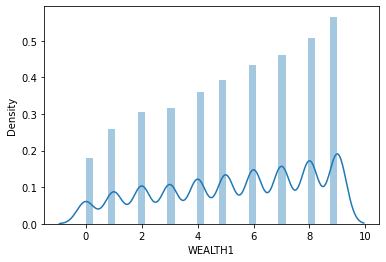

In [56]:
sns.distplot(numerical['WEALTH1'])

In [68]:
numerical['WEALTH1'].std()

2.74248950559107

In [69]:
numerical['WEALTH1'].mean()

5.345698500394633

In [70]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(np.mean(numerical['WEALTH1']))

<AxesSubplot:xlabel='WEALTH1', ylabel='Density'>

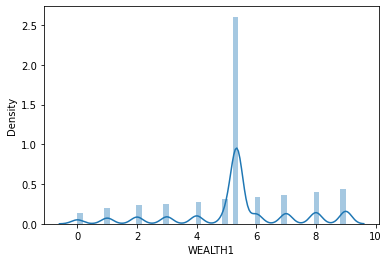

In [71]:
sns.distplot(numerical['WEALTH1'])

In [72]:
numerical['WEALTH1'].std()

1.9987559469258822